## Importar datos

In [7]:
# Librerias
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

In [8]:
df = pd.read_csv('../../Data/school_dropout.csv', sep=';')

In [9]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.0,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666.666.666.666.600,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.0,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.4,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.0,0,13.9,-0.3,0.79,Graduate


## Ver si hay nulos (no hay)

In [10]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

## Eliminar columnas a priori poco relevantes

In [11]:
eliminar = [
    'Application order',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (without evaluations)'
]

df = df.drop(columns=eliminar)

In [12]:
df.head()

,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Target
0,1,8,2,1,1,1,13,10,6,10,...,0,0,0.0,0,0,0.0,10.8,1.4,1.74,Dropout
1,1,6,11,1,1,1,1,3,4,4,...,6,6,14.0,6,6,13.666.666.666.666.600,13.9,-0.3,0.79,Graduate
2,1,1,5,1,1,1,22,27,10,10,...,6,0,0.0,6,0,0.0,10.8,1.4,1.74,Dropout
3,1,8,15,1,1,1,23,27,6,4,...,6,6,13.428.571.428.571.400,6,5,12.4,9.4,-0.8,-3.12,Graduate
4,2,12,3,0,1,1,22,28,10,10,...,6,5,12.333.333.333.333.300,6,6,13.0,13.9,-0.3,0.79,Graduate


In [13]:
df.dtypes

Marital status                           int64
Application mode                         int64
Course                                   int64
Daytime/evening attendance               int64
Previous qualification                   int64
Nacionality                              int64
Mother's qualification                   int64
Father's qualification                   int64
Mother's occupation                      int64
Father's occupation                      int64
Displaced                                int64
Educational special needs                int64
Debtor                                   int64
Tuition fees up to date                  int64
Gender                                   int64
Scholarship holder                       int64
Age at enrollment                        int64
International                            int64
Curricular units 1st sem (enrolled)      int64
Curricular units 1st sem (approved)      int64
Curricular units 1st sem (grade)        object
Curricular un

## Añadir dos nuevas columnas: % de asignaturas aprobadas (1er y 2o semestre)

In [14]:
# Calcular el ratio de unidades aprobadas sobre matriculadas para el primer semestre
df['1st sem Approval Ratio'] = df['Curricular units 1st sem (approved)'] / df['Curricular units 1st sem (enrolled)']

# Calcular el ratio de unidades aprobadas sobre matriculadas para el segundo semestre
df['2nd sem Approval Ratio'] = df['Curricular units 2nd sem (approved)'] / df['Curricular units 2nd sem (enrolled)']

# Redondear los ratios a dos decimales
df['1st sem Approval Ratio'] = df['1st sem Approval Ratio'].round(2)
df['2nd sem Approval Ratio'] = df['2nd sem Approval Ratio'].round(2)

# Reemplazar NaN en los ratios con 0
df['1st sem Approval Ratio'] = df['1st sem Approval Ratio'].fillna(0)
df['2nd sem Approval Ratio'] = df['2nd sem Approval Ratio'].fillna(0)

# Definir el nuevo orden de columnas
new_column_order = [
    'Marital status',
    'Application mode',
    'Course',
    'Daytime/evening attendance',
    'Previous qualification',
    'Nacionality',
    'Mother\'s qualification',
    'Father\'s qualification',
    'Mother\'s occupation',
    'Father\'s occupation',
    'Displaced',
    'Educational special needs',
    'Debtor',
    'Tuition fees up to date',
    'Gender',
    'Scholarship holder',
    'Age at enrollment',
    'International',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (approved)',
    '1st sem Approval Ratio',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (approved)',
    '2nd sem Approval Ratio',
    'Curricular units 2nd sem (grade)',
    'Unemployment rate',
    'Inflation rate',
    'GDP',
    'Target'
]

# Reordenar las columnas del DataFrame
df = df[new_column_order]
df.head()

,Marital status,Application mode,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,1st sem Approval Ratio,Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),2nd sem Approval Ratio,Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Target
0,1,8,2,1,1,1,13,10,6,10,...,0.00,0.0,0,0,0.00,0.0,10.8,1.4,1.74,Dropout
1,1,6,11,1,1,1,1,3,4,4,...,1.00,14.0,6,6,1.00,13.666.666.666.666.600,13.9,-0.3,0.79,Graduate
2,1,1,5,1,1,1,22,27,10,10,...,0.00,0.0,6,0,0.00,0.0,10.8,1.4,1.74,Dropout
3,1,8,15,1,1,1,23,27,6,4,...,1.00,13.428.571.428.571.400,6,5,0.83,12.4,9.4,-0.8,-3.12,Graduate
4,2,12,3,0,1,1,22,28,10,10,...,0.83,12.333.333.333.333.300,6,6,1.00,13.0,13.9,-0.3,0.79,Graduate


## Convertir categóricas a dummies

In [15]:
categoricas = [
    'Marital status', 
    'Nacionality', 
    'Application mode', 
    'Course', 
    'Previous qualification', 
    'Mother\'s qualification', 
    'Father\'s qualification', 
    'Mother\'s occupation', 
    'Father\'s occupation', 
    'Gender', 
    'Daytime/evening attendance', 
    'Displaced', 
    'Educational special needs', 
    'Debtor', 
    'Tuition fees up to date', 
    'Scholarship holder', 
    'International'
]

In [16]:
df = pd.get_dummies(df, columns=categoricas)
df.head()

,Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),1st sem Approval Ratio,Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),2nd sem Approval Ratio,Curricular units 2nd sem (grade),Unemployment rate,...,Educational special needs_0,Educational special needs_1,Debtor_0,Debtor_1,Tuition fees up to date_0,Tuition fees up to date_1,Scholarship holder_0,Scholarship holder_1,International_0,International_1
0,20,0,0,0.00,0.0,0,0,0.00,0.0,10.8,...,True,False,True,False,False,True,True,False,True,False
1,19,6,6,1.00,14.0,6,6,1.00,13.666.666.666.666.600,13.9,...,True,False,True,False,True,False,True,False,True,False
2,19,6,0,0.00,0.0,6,0,0.00,0.0,10.8,...,True,False,True,False,True,False,True,False,True,False
3,20,6,6,1.00,13.428.571.428.571.400,6,5,0.83,12.4,9.4,...,True,False,True,False,False,True,True,False,True,False
4,45,6,5,0.83,12.333.333.333.333.300,6,6,1.00,13.0,13.9,...,True,False,True,False,False,True,True,False,True,False


## Convertir formato de la nota media del semestre

In [17]:
def convert_grade_format(value):
    try:
        # Intentar convertir el valor a float para manejar valores correctamente formateados
        return float(value)
    except ValueError:
        # Si el valor no es convertible directamente, convertirlo a float y luego redondear a 1 decimal
        # Extracción del primer valor significativo antes de convertirlo
        return round(float(value.split('.')[0] + '.' + value.split('.')[1][:1]), 1)

# Aplicar la función a las columnas 'Curricular units 1st sem (grade)' y 'Curricular units 2nd sem (grade)'
df['Curricular units 1st sem (grade)'] = df['Curricular units 1st sem (grade)'].apply(convert_grade_format)
df['Curricular units 2nd sem (grade)'] = df['Curricular units 2nd sem (grade)'].apply(convert_grade_format)

In [18]:
df.head()

,Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),1st sem Approval Ratio,Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),2nd sem Approval Ratio,Curricular units 2nd sem (grade),Unemployment rate,...,Educational special needs_0,Educational special needs_1,Debtor_0,Debtor_1,Tuition fees up to date_0,Tuition fees up to date_1,Scholarship holder_0,Scholarship holder_1,International_0,International_1
0,20,0,0,0.00,0.0,0,0,0.00,0.0,10.8,...,True,False,True,False,False,True,True,False,True,False
1,19,6,6,1.00,14.0,6,6,1.00,13.6,13.9,...,True,False,True,False,True,False,True,False,True,False
2,19,6,0,0.00,0.0,6,0,0.00,0.0,10.8,...,True,False,True,False,True,False,True,False,True,False
3,20,6,6,1.00,13.4,6,5,0.83,12.4,9.4,...,True,False,True,False,False,True,True,False,True,False
4,45,6,5,0.83,12.3,6,6,1.00,13.0,13.9,...,True,False,True,False,False,True,True,False,True,False


In [19]:
# Encontrar valores que superan 20 en 'Curricular units 1st sem (grade)'
valores_mayores_1st_sem = df[df['Curricular units 1st sem (grade)'] > 20]

# Encontrar valores que superan 20 en 'Curricular units 2nd sem (grade)'
valores_mayores_2nd_sem = df[df['Curricular units 2nd sem (grade)'] > 20]

# Mostrar los resultados
print("Valores mayores a 20 en 'Curricular units 1st sem (grade)':")
print(valores_mayores_1st_sem[['Curricular units 1st sem (grade)']].head())

print("\nValores mayores a 20 en 'Curricular units 2nd sem (grade)':")
print(valores_mayores_2nd_sem[['Curricular units 2nd sem (grade)']].head())

Valores mayores a 20 en 'Curricular units 1st sem (grade)':
     Curricular units 1st sem (grade)
21                            114.375
130                           132.375
412                           115.875
446                           144.125
559                           125.075

Valores mayores a 20 en 'Curricular units 2nd sem (grade)':
     Curricular units 2nd sem (grade)
139                           175.875
171                           135.625
215                           133.125
224                           149.125
240                           114.625


In [20]:
def ajustar_valor(value):
    if pd.notna(value) and value > 20:
        # Desplazar el decimal un lugar a la izquierda
        return value / 10
    return value

# Aplicar la función a las columnas de calificaciones
df['Curricular units 1st sem (grade)'] = df['Curricular units 1st sem (grade)'].apply(ajustar_valor)
df['Curricular units 2nd sem (grade)'] = df['Curricular units 2nd sem (grade)'].apply(ajustar_valor)

# Redondear a un decimal
df['Curricular units 1st sem (grade)'] = df['Curricular units 1st sem (grade)'].round(1)
df['Curricular units 2nd sem (grade)'] = df['Curricular units 2nd sem (grade)'].round(1)

In [21]:
# Nota media máxima 1er semestre
df['Curricular units 1st sem (grade)'].describe()

count    4424.000000
mean       10.310601
std         5.028960
min         0.000000
25%        10.800000
50%        12.200000
75%        13.300000
max        18.900000
Name: Curricular units 1st sem (grade), dtype: float64

In [22]:
# Nota media máxima 2nd semestre
df['Curricular units 2nd sem (grade)'].describe()

count    4424.000000
mean        9.834155
std         5.388056
min         0.000000
25%        10.300000
50%        12.000000
75%        13.200000
max        18.500000
Name: Curricular units 2nd sem (grade), dtype: float64

In [23]:
df.head()

,Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),1st sem Approval Ratio,Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),2nd sem Approval Ratio,Curricular units 2nd sem (grade),Unemployment rate,...,Educational special needs_0,Educational special needs_1,Debtor_0,Debtor_1,Tuition fees up to date_0,Tuition fees up to date_1,Scholarship holder_0,Scholarship holder_1,International_0,International_1
0,20,0,0,0.00,0.0,0,0,0.00,0.0,10.8,...,True,False,True,False,False,True,True,False,True,False
1,19,6,6,1.00,14.0,6,6,1.00,13.6,13.9,...,True,False,True,False,True,False,True,False,True,False
2,19,6,0,0.00,0.0,6,0,0.00,0.0,10.8,...,True,False,True,False,True,False,True,False,True,False
3,20,6,6,1.00,13.4,6,5,0.83,12.4,9.4,...,True,False,True,False,False,True,True,False,True,False
4,45,6,5,0.83,12.3,6,6,1.00,13.0,13.9,...,True,False,True,False,False,True,True,False,True,False


## Estandarizar variables continuas

In [24]:
continuas = [
    'Age at enrollment',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

In [25]:
df['Unemployment rate'].describe()

count    4424.000000
mean       11.566139
std         2.663850
min         7.600000
25%         9.400000
50%        11.100000
75%        13.900000
max        16.200000
Name: Unemployment rate, dtype: float64

In [26]:
df['Inflation rate'].describe()

count    4424.000000
mean        1.228029
std         1.382711
min        -0.800000
25%         0.300000
50%         1.400000
75%         2.600000
max         3.700000
Name: Inflation rate, dtype: float64

In [27]:
df['GDP'].describe()

count    4424.000000
mean        0.001969
std         2.269935
min        -4.060000
25%        -1.700000
50%         0.320000
75%         1.790000
max         3.510000
Name: GDP, dtype: float64

In [28]:
scaler = MinMaxScaler()
df[continuas] = scaler.fit_transform(df[continuas])
df.head()

,Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),1st sem Approval Ratio,Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),2nd sem Approval Ratio,Curricular units 2nd sem (grade),Unemployment rate,...,Educational special needs_0,Educational special needs_1,Debtor_0,Debtor_1,Tuition fees up to date_0,Tuition fees up to date_1,Scholarship holder_0,Scholarship holder_1,International_0,International_1
0,0.056604,0,0,0.00,0.000000,0,0,0.00,0.000000,0.372093,...,True,False,True,False,False,True,True,False,True,False
1,0.037736,6,6,1.00,0.740741,6,6,1.00,0.735135,0.732558,...,True,False,True,False,True,False,True,False,True,False
2,0.037736,6,0,0.00,0.000000,6,0,0.00,0.000000,0.372093,...,True,False,True,False,True,False,True,False,True,False
3,0.056604,6,6,1.00,0.708995,6,5,0.83,0.670270,0.209302,...,True,False,True,False,False,True,True,False,True,False
4,0.528302,6,5,0.83,0.650794,6,6,1.00,0.702703,0.732558,...,True,False,True,False,False,True,True,False,True,False


## Convertir variable objetivo en binaria 
#### (ya que toma tres valores: Dropout, Graduate, Enrolled)

In [29]:
df['Target_bin'] = df['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

In [30]:
df = df.drop('Target', axis=1)

In [31]:
df.head()

,Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),1st sem Approval Ratio,Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),2nd sem Approval Ratio,Curricular units 2nd sem (grade),Unemployment rate,...,Educational special needs_1,Debtor_0,Debtor_1,Tuition fees up to date_0,Tuition fees up to date_1,Scholarship holder_0,Scholarship holder_1,International_0,International_1,Target_bin
0,0.056604,0,0,0.00,0.000000,0,0,0.00,0.000000,0.372093,...,False,True,False,False,True,True,False,True,False,1
1,0.037736,6,6,1.00,0.740741,6,6,1.00,0.735135,0.732558,...,False,True,False,True,False,True,False,True,False,0
2,0.037736,6,0,0.00,0.000000,6,0,0.00,0.000000,0.372093,...,False,True,False,True,False,True,False,True,False,1
3,0.056604,6,6,1.00,0.708995,6,5,0.83,0.670270,0.209302,...,False,True,False,False,True,True,False,True,False,0
4,0.528302,6,5,0.83,0.650794,6,6,1.00,0.702703,0.732558,...,False,True,False,False,True,True,False,True,False,0


## Separar variable 'Target' y explicativas

In [32]:
y = df['Target_bin']
X = df.drop('Target_bin', axis=1)

## Correlaciones entre las variables explicativas continuas

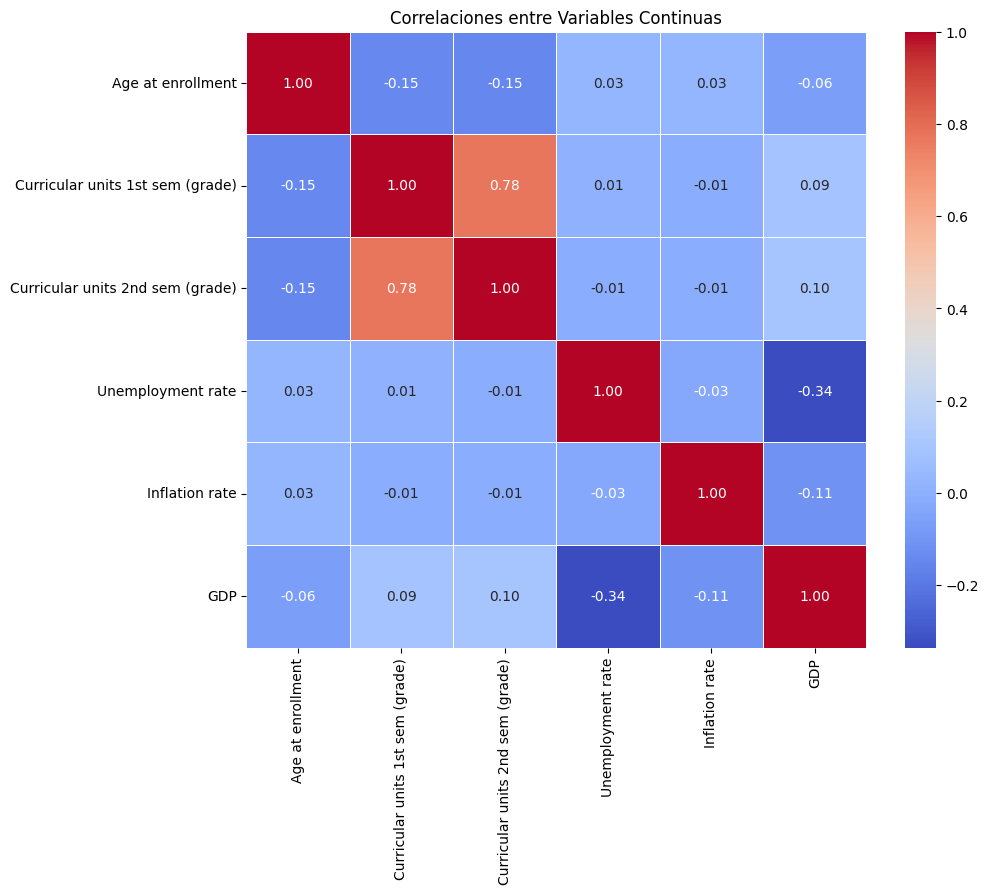

In [33]:
df_continuas = df[continuas]
corr_matrix = df_continuas.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlaciones entre Variables Continuas')
plt.show()

## Correlación de las variables continuas con las variable objetivo

In [34]:
df_target = df[continuas + ['Target_bin']]

# Calcular las correlaciones entre las variables continuas y la variable objetivo binaria
corr_con_target = df_target.corr()['Target_bin'].sort_values(ascending=False)
corr_con_target = corr_con_target.drop(labels=['Target_bin'])
corr_con_target

Age at enrollment                   0.254215
Inflation rate                      0.027826
Unemployment rate                   0.012980
GDP                                -0.046319
Curricular units 1st sem (grade)   -0.427643
Curricular units 2nd sem (grade)   -0.508645
Name: Target_bin, dtype: float64

In [35]:
df.head()

,Age at enrollment,Curricular units 1st sem (enrolled),Curricular units 1st sem (approved),1st sem Approval Ratio,Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),2nd sem Approval Ratio,Curricular units 2nd sem (grade),Unemployment rate,...,Educational special needs_1,Debtor_0,Debtor_1,Tuition fees up to date_0,Tuition fees up to date_1,Scholarship holder_0,Scholarship holder_1,International_0,International_1,Target_bin
0,0.056604,0,0,0.00,0.000000,0,0,0.00,0.000000,0.372093,...,False,True,False,False,True,True,False,True,False,1
1,0.037736,6,6,1.00,0.740741,6,6,1.00,0.735135,0.732558,...,False,True,False,True,False,True,False,True,False,0
2,0.037736,6,0,0.00,0.000000,6,0,0.00,0.000000,0.372093,...,False,True,False,True,False,True,False,True,False,1
3,0.056604,6,6,1.00,0.708995,6,5,0.83,0.670270,0.209302,...,False,True,False,False,True,True,False,True,False,0
4,0.528302,6,5,0.83,0.650794,6,6,1.00,0.702703,0.732558,...,False,True,False,False,True,True,False,True,False,0


## Estudiamos clases desbalanceadas

In [39]:
df['Target_bin'].value_counts()

Target_bin
0    3003
1    1421
Name: count, dtype: int64

No hace falta meter smote

## Guardar dataframe depurado en .csv

In [38]:
df.to_csv('../../Data/dropout_depurado.csv', index=False)